# Written by Abiola Obembe
## Date: 18th March 2020
#### In this notebook we practice k-means clustering with 2 examples:
####  1. Random generated dataset i.e. make_blob dataset
##### 2. Customer segmentation

In [1]:
# import libraries required
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

print("libraries installed!")

libraries installed!


In [2]:
# generate/load make_blob dataset
X, y = make_blobs(n_samples=5000, centers= [[4 , 4], [-2, -1], [2 , -3], [1 , 1]] , cluster_std = 0.8 , random_state= 4)


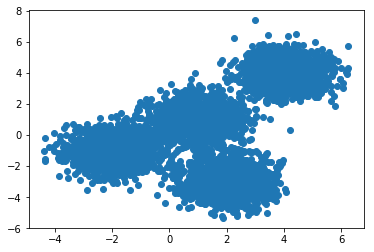

In [4]:
# Plot scatter plot for feature X

plt.scatter(X[:,0], X[:, 1] , marker = 'o')
plt.show()

In [5]:
# Display unique labels in target field
set(y)

{0, 1, 2, 3}

In [6]:
# Modeling with KMeans
k_means = KMeans(n_clusters=4, init='k-means++', n_init=12, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')

k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
# Display labels for each point in the model i.e. training set
k_means_labels = k_means.labels_
set(k_means_labels)

{0, 1, 2, 3}

In [16]:
# Label and save cluster centorid cordinates
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers    


array([[-2.0151886 , -1.00128769],
       [ 4.00899749,  4.02657658],
       [ 2.00787945, -2.98645093],
       [ 0.994734  ,  1.00663511]])

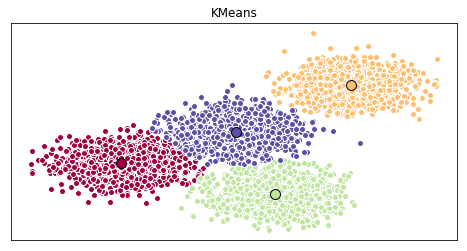

In [17]:
# Visualize the clustering

fig = plt.figure(figsize= (8,4))
colors = plt.cm.Spectral(np.linspace(0 , 1 , len(set(k_means_labels)) ))
ax = fig.add_subplot(1,1,1)
#for k , col in zip( range (len([ [4,4], [-2,-1], [2, -3], [1 , 1]])), colors):
for k , col in zip( range (len(k_means_cluster_centers)), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot( X[my_members, 0] ,  X[my_members, 1] , 'w' , markerfacecolor = col , marker = 'o')
    ax.plot( cluster_center[0] ,  cluster_center[1] , 'o' , markerfacecolor = col , markeredgecolor= 'k', markersize = 10)
               
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()
    

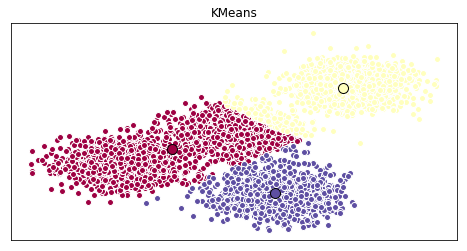

In [18]:
# Assuming three clusters
kmeans_3 = KMeans(n_clusters=3, init='k-means++', n_init=12, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto').fit(X)

# Define labels of each point
k_means_3_labels = kmeans_3.labels_

# Define new cluster center cordinates
k_means_3_cluster_centers = kmeans_3.cluster_centers_

# Visualize the clustering

fig = plt.figure(figsize= (8,4))
colors = plt.cm.Spectral(np.linspace(0 , 1 , len(set(k_means_3_labels)) ))
ax = fig.add_subplot(1,1,1)
for k , col in zip( range (len(k_means_3_cluster_centers)), colors):
    my_members = (k_means_3_labels == k)
    cluster_center = k_means_3_cluster_centers[k]
    ax.plot( X[my_members, 0] ,  X[my_members, 1] , 'w' , markerfacecolor = col , marker = 'o')
    ax.plot( cluster_center[0] ,  cluster_center[1] , 'o' , markerfacecolor = col , markeredgecolor= 'k', markersize = 10)
               
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.show()
    



# Example 2 : Customer segmentation

#### Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. 
#### It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service.
#### bA business task is to retaining those customers. Another group might include customers from non-profit organizations. 
#### And so on.

In [19]:
# download dataset
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
    
cust_df = pd.read_csv("Cust_Segmentation.csv")

cust_df.head(10)

--2020-03-19 02:21:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

100%[======================================>] 34,276      --.-K/s   in 0.001s  

2020-03-19 02:21:04 (22.3 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [23]:
# Exploratory analysis of dataframe

print("The number of rows is :"   , cust_df.shape[0])
print("The number of columns is :",  cust_df.shape[1])

The number of rows is : 850
The number of columns is : 10


In [25]:
# Exploratory analysis of dataframe

cust_df.dtypes

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [31]:
# Exploratory analysis of dataframe

print ("The Column Address has", len(cust_df['Address'].unique()), " unique values")

The Column Address has 32  unique values


In [35]:
# Exploratory analysis of dataframe

cust_df['Address'].value_counts()

NBA001    71
NBA002    71
NBA000    60
NBA004    58
NBA003    55
NBA006    50
NBA008    49
NBA009    45
NBA005    43
NBA007    41
NBA010    37
NBA011    36
NBA012    28
NBA014    24
NBA013    22
NBA016    22
NBA017    20
NBA015    18
NBA019    16
NBA018    14
NBA023    11
NBA026    10
NBA021    10
NBA022     9
NBA025     9
NBA020     8
NBA024     4
NBA027     4
NBA031     2
NBA030     1
NBA029     1
NBA034     1
Name: Address, dtype: int64

In [36]:
# Exploratory analysis of dataframe

cust_df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [37]:
# Exploratory analysis of dataframe
cust_df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [38]:
# Exploratory analysis of dataframe

cust_df.corr()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,1.000000,-0.004447,-0.031113,-0.035146,-0.017675,0.001015,-0.009061,-0.004244,0.014039
Age,-0.004447,1.000000,0.012983,0.554241,0.476218,0.278912,0.337839,-0.137657,0.008240
Edu,-0.031113,0.012983,1.000000,-0.151117,0.218219,0.099081,0.140938,0.114676,0.008053
Years Employed,-0.035146,0.554241,-0.151117,1.000000,0.625093,0.381744,0.414430,-0.282978,-0.033625
Income,-0.017675,0.476218,0.218219,0.625093,1.000000,0.551510,0.603356,-0.070970,-0.035585
Card Debt,0.001015,0.278912,0.099081,0.381744,0.551510,1.000000,0.644955,0.244734,0.514971
Other Debt,-0.009061,0.337839,0.140938,0.414430,0.603356,0.644955,1.000000,0.145716,0.572545
Defaulted,-0.004244,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.014039,0.008240,0.008053,-0.033625,-0.035585,0.514971,0.572545,0.389575,1.000000


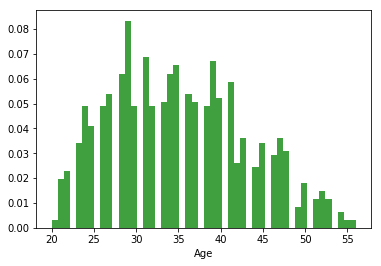

In [40]:
# Visual Exploratory analysis of dataframe

x = cust_df['Age'].values
plt.hist(x , bins = 50 , density=True, facecolor='g', alpha=0.75 )
plt.xlabel('Age')
plt.show()

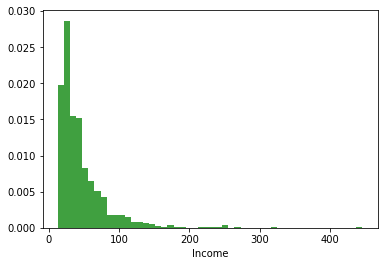

In [41]:
# Visual Exploratory analysis of dataframe

x = cust_df['Income'].values
plt.hist(x , bins = 50 , density=True, facecolor='g', alpha=0.75 )
plt.xlabel('Income')
plt.show()

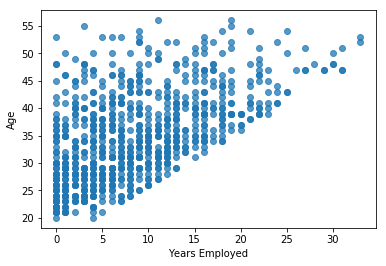

In [45]:
# Visual Exploratory analysis of dataframe

plt.scatter(cust_df['Years Employed'].values, cust_df['Age'].values, marker='o', alpha=0.75 )
plt.ylabel('Age')
plt.xlabel('Years Employed')
plt.show()

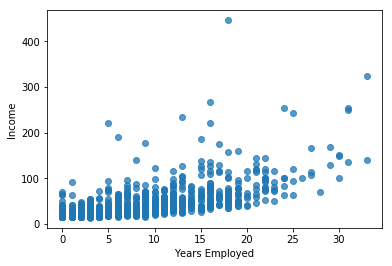

In [44]:
# Visual Exploratory analysis of dataframe

plt.scatter(cust_df['Years Employed'].values ,cust_df['Income'].values , marker='o', alpha=0.75 )
plt.ylabel('Income')
plt.xlabel('Years Employed')
plt.show()

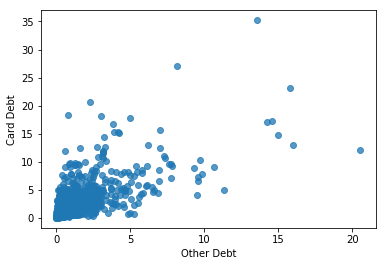

In [46]:
# Visual Exploratory analysis of dataframe

plt.scatter(cust_df['Card Debt'].values ,cust_df['Other Debt'].values , marker='o', alpha=0.75 )
plt.ylabel('Card Debt')
plt.xlabel('Other Debt')
plt.show()

In [47]:
# KMeans algorthim isn't diurectly applicable to categorical values hence we romve this column form datafrane
df = cust_df.drop('Address', axis = 1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [48]:
# Checking for null values in dataframe
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [61]:
# Inspect the colum with null or nan
df[['Defaulted']]

,Defaulted
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
5,NaN
6,0.0
7,0.0
8,NaN
9,0.0


In [63]:
# Normalize feature X
X = np.asanyarray(df)

# check how may entries have nan
np.isnan(X).sum()

150

In [64]:
# Convert all Nan to zero
X = np.nan_to_num(X)

# Check how many parameters are Nan in X
np.isnan(X).sum()

0

In [67]:
# normalize and display featuretarining set

from sklearn.preprocessing import StandardScaler
Clus_dataset = StandardScaler().fit_transform(X)

Clus_dataset


array([[-1.7300143 ,  0.74291541,  0.31212243, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938, ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243, ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [ 1.72186347, -1.24795149,  2.46906604, ...,  0.03863257,
         1.90913822,  3.45892281],
       [ 1.72593888, -0.37694723, -0.76634938, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 1.7300143 ,  2.1116364 , -0.76634938, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [68]:
# Modeling with KMeans

# Initialization
clusters = 3
k_means = KMeans(n_clusters= clusters, init='k-means++', n_init=12, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')

k_means


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [69]:
# fitting
k_means.fit(Clus_dataset)

# labels
labels = k_means.labels_

print(labels)


[2 1 0 2 1 1 2 2 2 1 0 2 2 2 0 2 2 2 1 2 2 2 0 1 1 2 2 2 2 2 2 1 0 2 2 2 0
 0 2 1 0 1 2 1 2 1 2 2 2 2 1 1 0 2 0 0 0 2 2 2 1 2 1 1 2 2 2 0 2 0 2 2 2 2
 2 2 2 2 1 2 2 0 1 2 1 2 2 2 0 0 2 2 0 0 2 2 2 2 0 2 0 1 2 0 0 1 2 2 2 2 2
 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 1 2 2 0
 2 2 2 1 0 2 2 2 2 1 0 0 2 1 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 2 0 1 0 2 2 1 0
 1 2 2 2 2 2 1 2 0 2 2 2 1 1 2 1 2 0 2 2 0 2 1 2 0 2 2 2 2 2 0 0 1 2 2 0 1
 2 2 2 2 1 2 2 0 2 2 2 2 1 2 2 0 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 0 2 0 2
 2 2 1 2 0 1 0 2 1 2 2 0 2 2 2 2 0 0 0 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 0 2 2
 0 2 0 1 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 0 2 0 1 2 0 2 2 2 0 0 2 2 2 1 0
 2 2 0 2 1 2 2 2 2 2 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 0 2 0 2 2 2 1 1 2
 0 2 1 0 0 2 2 2 0 2 2 2 2 2 1 2 1 2 2 2 2 0 2 0 2 2 2 1 2 2 2 2 0 2 2 0 0
 1 2 2 2 2 2 0 0 2 1 0 1 2 2 0 2 2 1 1 2 0 2 2 1 2 0 2 1 2 2 2 1 2 2 2 2 1
 2 0 2 2 2 2 1 0 2 2 1 2 0 2 2 1 2 1 2 2 2 2 2 2 2 1 1 2 2 1 2 0 2 2 2 0 2
 0 2 2 2 2 2 1 0 0 2 1 2 

In [70]:
# Insights
df['Labels'] = labels

df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [71]:
# Checking centroids with two approaches

# Approach one (normalized)
centroid_centers = k_means.cluster_centers_
print(centroid_centers) 

# Approach two (unnormalized)
print(df.groupby('Labels').mean())


[[-4.27182210e-03 -3.90439547e-01  1.62695612e-01 -6.79376729e-01
  -3.86448408e-01 -6.83901553e-05 -6.93056978e-02  1.87982575e+00
   5.69270845e-01]
 [-4.44968943e-03  9.91773769e-01  2.38756999e-01  1.27421461e+00
   1.43518566e+00  1.24440502e+00  1.43538377e+00 -2.09335587e-01
   5.57517111e-01]
 [ 2.53859742e-03 -1.50796609e-01 -1.15651304e-01 -1.38795179e-01
  -2.73411279e-01 -3.40626044e-01 -3.71502176e-01 -5.23796543e-01
  -3.28592133e-01]]
        Customer Id        Age       Edu  Years Employed      Income  \
Labels                                                                 
0        424.451807  31.891566  1.861446        3.963855   31.789157   
1        424.408163  43.000000  1.931973       17.197279  101.959184   
2        426.122905  33.817505  1.603352        7.625698   36.143389   

        Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Labels                                                     
0        1.576675    2.843355   0.993939        13.994578  
1    

In [72]:
# Summarize dataframe
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


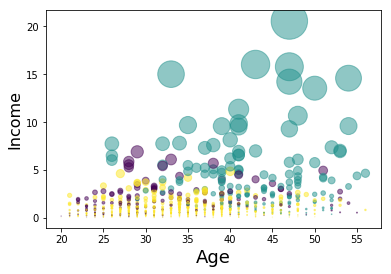

In [76]:
# Examine the distribution of customers based ib their age abd income
area = np.pi*(X[:,5])**2
plt.scatter( X[:,1], X[:,5], s = area , c = labels.astype(float), alpha = 0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

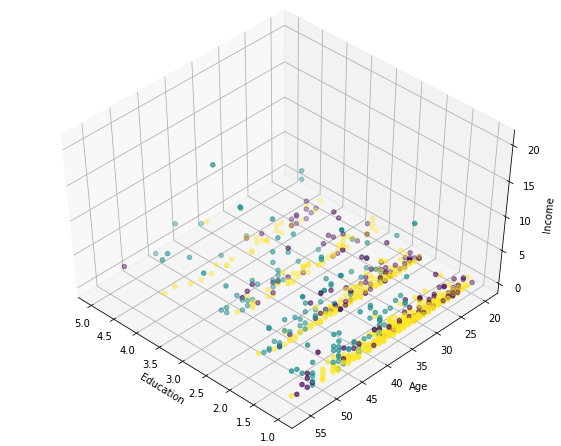

In [77]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 2], X[:, 1], X[:, 5], c= labels.astype(np.float))